In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import math

## Importing the dataframe

In [165]:
df = pd.read_csv("Salary_Data.csv")

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  37 non-null     float64
 1   Salary           37 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [167]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking if there are null entries in the data frame

In [168]:
df.isna().sum()

YearsExperience    3
Salary             3
dtype: int64

## Deleting the null records in the data frame since it is insignificant

In [169]:
df.dropna(inplace = True)

In [170]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Analysing the data

In [171]:
df.describe()

,YearsExperience,Salary
count,3.400000e+01,3.400000e+01
mean,3.568592e+04,1.575851e+06
std,2.078859e+05,8.558673e+06
min,1.100000e+00,9.859000e+03
25%,3.050000e+00,5.672075e+04
50%,4.700000e+00,6.523700e+04
75%,8.125000e+00,1.045120e+05
max,1.212206e+06,5.000000e+07


## Outliers are detected in years of experience, lets find them

In [172]:
df[df["YearsExperience"] > 100]

,YearsExperience,Salary
32,1212206.0,59000.0
33,951.0,9859.0


## Removing the outliers

In [173]:
new_df = df[df["YearsExperience"] < 100]

## Analysing the data again

In [174]:
new_df.describe()

,YearsExperience,Salary
count,32.000000,3.200000e+01
mean,5.137500,1.672190e+06
std,2.833526,8.821215e+06
min,1.100000,3.773100e+04
25%,3.000000,5.687825e+04
50%,4.300000,6.698350e+04
75%,7.300000,1.065442e+05
max,10.500000,5.000000e+07


## Plotting the data for further verification

Text(0, 0.5, 'salary')

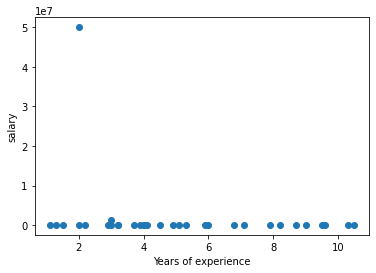

In [175]:
plt.scatter(new_df["YearsExperience"], new_df["Salary"])
plt.xlabel("Years of experience")
plt.ylabel("salary")

## There are outliers in Salary too, lets find and remove them.

In [176]:
df[df["Salary"] > 1.0e+06]

,YearsExperience,Salary
30,2.0,50000000.0
31,3.0,1230000.0


In [177]:
new_df = new_df[new_df["Salary"] < 1.0e+06]

## Analysing it again to see if everything is fine or not.

In [178]:
new_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Plotting the data

Text(0, 0.5, 'salary')

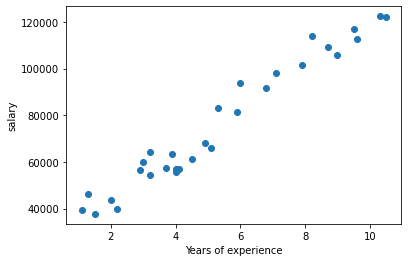

In [179]:
plt.scatter(new_df["YearsExperience"], new_df["Salary"])
plt.xlabel("Years of experience")
plt.ylabel("salary")

## Got a nice linear set of data points.
### Can proceed for linear regression now

In [180]:
x = new_df['YearsExperience'].to_numpy()
y = new_df['Salary'].to_numpy()

model = LinearRegression().fit(x.reshape(-1, 1), y)

In [181]:
m = model.coef_
c = model.intercept_
print('intercept:', c)
print('slope    :', m)

intercept: 25792.200198668717
slope    : [9449.96232146]


In [182]:
y_pred = model.predict(x.reshape(-1,1))

## Plotting the predicted and the original data.

Text(0, 0.5, 'temp (F)')

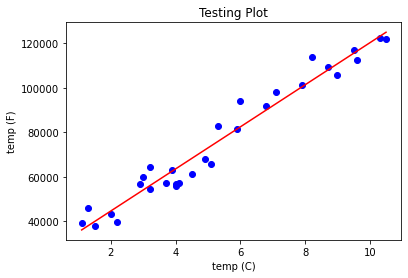

In [183]:
plt.scatter(x,y, marker = 'o', color = 'blue')

plt.plot(x,y_pred, color = 'red')
plt.title("Testing Plot")
plt.xlabel("temp (C)")
plt.ylabel("temp (F)")

## Predicting salary for years of experience using the model we created

In [184]:
exp = 4
approx_salary = m * exp + c
print(approx_salary)

[63592.04948449]


## Performing error analysis
### Mean Squared Error(MSE)

In [185]:
metrics.mean_squared_error(y, y_pred)

31270951.722280957

### Mean Absolute Error(MAE)

In [186]:
metrics.mean_absolute_error(y, y_pred)

4644.2012894435375

### Root Mean Squared Error (RMSE)

In [187]:
math.sqrt(metrics.mean_squared_error(y, y_pred))

5592.043608760661